<a href="https://colab.research.google.com/github/pcpiscator/01T2021/blob/main/C%C3%B3pia_de_Furg_ECD_01_Machine_Learning_I_Introdu%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso de Especialização em Ciência de Dados - FURG
## Machine Learning I - Introdução
### Prof. Marcelo de Gomensoro Malheiros

Código adaptado de Aurélien Geron (licença Apache-2.0)

---

# Inicialização

Aqui importamos as bibliotecas fundamentais de Python para este _notebook_:

- NumPy: suporte a vetores, matrizes e operações de Álgebra Linear
- Matplotlib: biblioteca de visualização de dados
- Pandas: pacote estatístico e de manipulação de DataFrames
- scikit-learn: biblioteca com algoritmos de Machine Learning

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# Etapa 1: Análise dos dados e seleção de _features_

## Importação dos dados

As bases de dados utilizadas são duas.

A primeira é também um arquivo CSV, contendo informações sobre o Produto Interno Bruto per Capita (GDP, em inglês) de diversos países. Os dados vieram do Fundo Monetário Internacional (FMI), em https://www.imf.org/en/Publications/SPROLLs/world-economic-outlook-databases

A segunda é um arquivo CSV, contendo índices de satisfação por país tabulados pela Organização para a Cooperação e Desenvolvimento Econômico (OECD, em inglês). Os dados originais estão em http://stats.oecd.org/index.aspx?DataSetCode=BLI

In [7]:
# importação usando Pandas

gdp_per_capita = pd.read_csv('https://raw.githubusercontent.com/pcpiscator/01T2021/main/gdp_per_capita.csv', thousands=',', delimiter='\t', 
                             encoding='latin1', na_values='n/a')
gdp_per_capita.rename(columns={'2015': 'GDP per capita'}, inplace=True)
gdp_per_capita.set_index('Country', inplace=True)

oecd_bli = pd.read_csv('https://raw.githubusercontent.com/pcpiscator/01T2021/main/oecd_bli_2015.csv',  thousands=',')
oecd_bli = oecd_bli[oecd_bli['INEQUALITY']=='TOT']
oecd_bli = oecd_bli.pivot(index='Country', columns='Indicator', values='Value')

In [8]:
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [9]:
oecd_bli.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,Job security,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,20.0,4.8,82.1,7.3,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,21.0,3.9,81.0,6.9,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [10]:
# novo DataFrame combinando as duas bases

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by='GDP per capita', inplace=True)

In [11]:
full_country_stats.head(2)

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,Job security,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,21.0,4.6,73.7,7.0,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,21.0,4.9,74.6,6.7,0.08,16193.0,77.0,1.0,66.0,417.0,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0


## Preparação dos dados

Para simplificar a análise, os campos importantes das duas bases são colocados em um novo DataFrame chamado `country_stats`, com um conjunto menor de países.

O índice da nova base é o nome do país (em inglês), e os atributos selecionados são o produto interno bruto per capita `GDP per capita` e índice de satisfação pessoal `Life satisfaction`.

A idéia é verificar se o o produto interno bruto per capita é uma _feature_ adequada para prever o índice de satisfação pessoal.

In [12]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))
country_stats = full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]

In [9]:
country_stats.head(2)

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6


# Etapa 2: Escolha da abordagem de ML

Como os dois atributos são valores reais, é natural tentar uma abordagem de regressão numérica. Em particular, o tipo mais simples de regressão: uma **regressão linear**.

In [13]:
# extração das colunas 'GDP per capita' para 'X' e 'Life satisfaction' para y

X = np.c_[country_stats['GDP per capita']]
y = np.c_[country_stats['Life satisfaction']]

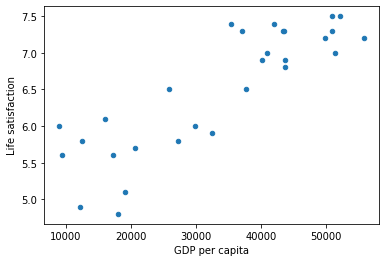

In [14]:
# visualização dos dados

country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction')
plt.show()

# Etapa 3: Definição do modelo e de seus parâmetros

Como uma regressão linear é bastante simples, os parâmetros a serem aprendidos são simplesmente os coeficientes da melhor reta de ajuste.

Documentação: https://scikit-learn.org/stable/modules/linear_model.html

In [15]:
from sklearn import linear_model

# criação do modelo
model = linear_model.LinearRegression()

# Etapa 4: Treino com os dados de treinamento

Basta fornecer os dados preditores da série `X` e os respectivos valores conhecidos em `y` para o método `fit()` do modelo.

Os parâmetros para o melhor ajuste a esse conjunto de treinamento são obtidos nos atributos `intercept_` e `coef_`.

In [16]:
# treinando o modelo
model.fit(X, y)

# parâmetros do modelo (inclinação e ponto de interseção da reta) aprendidos
theta_0 = model.intercept_[0]
theta_1 = model.coef_[0, 0]

Em geral o parâmetros de um modelo são representados pela letra grega $\theta$ (teta).

No caso de uma regressão linear, correspondem ao ponto de interseção com o eixo horizontal e com a inclinação da reta de aproximação.

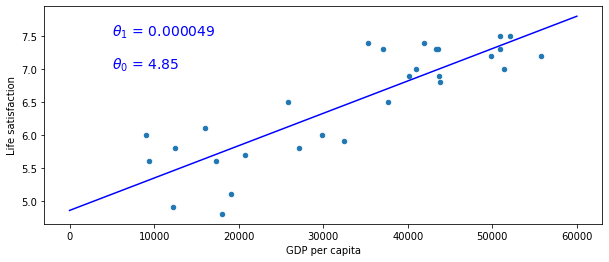

In [17]:
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(10,4))

# plotagem da reta
X = np.linspace(0, 60000, 10)
plt.plot(X, theta_0 + theta_1 * X, 'b')

# legenda
plt.text(5000, 7.5, '$\\theta_1$ = {:.6f}'.format(theta_1), fontsize=14, color="b")
plt.text(5000, 7.0, '$\\theta_0$ = {:.2f}'.format(theta_0), fontsize=14, color="b")

plt.show()

# Etapa 5: Avaliação com os dados de teste

Pode-se avaliar a qualidade do modelo ao se comparar valores previstos com valores reais, para outros dados. Isso será feito com **medidas de desempenho** (_performance measures_), a serem analisadas em breve.

É importante que estes dados de teste **não façam parte dos dados de treinamento**.

In [18]:
# valores reais do produto interno bruto per capita e satisação pessoal
brazil_gdp = full_country_stats['GDP per capita']['Brazil']
brazil_sat = full_country_stats['Life satisfaction']['Brazil']

# previsão
X = [[brazil_gdp]]
y = model.predict(X)
predic_sat = y[0, 0]

print('Brasil, satisfação prevista: {:.2f}'.format(predic_sat))
print('Brasil, satisfação real:     {:.2f}'.format(brazil_sat))

Brasil, satisfação prevista: 5.28
Brasil, satisfação real:     7.00


# Etapa 6: Aplicação do modelo para fazer previsões sobre novos casos

In [19]:
# não há informações sobre satisação pessoal do Chipre nos dados da OECD
cyprus_gdp = gdp_per_capita['GDP per capita']['Cyprus']

# previsão
X = [[cyprus_gdp]]
y = model.predict(X)
predic_sat = y[0, 0]

print('Chipre, satisfação prevista: {:.2f}'.format(predic_sat))

Chipre, satisfação prevista: 5.96


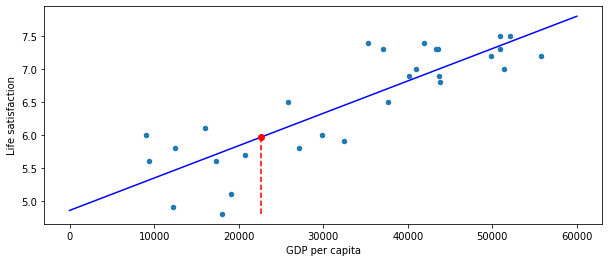

In [20]:
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(10,4))

# plotagem da reta
X = np.linspace(0, 60000, 10)
plt.plot(X, theta_0 + theta_1 * X, 'b')

# mostra previsão para Chipre
plt.plot([cyprus_gdp, cyprus_gdp], [4.8, predic_sat], 'r--')
plt.plot(cyprus_gdp, predic_sat, 'ro')

plt.show()

---

# Principais desafios de Machine Learning

## a. Quantidade insuficiente de dados de treinamento

São necessários muitos dados para que a maioria dos algoritmos de aprendizado de máquina funcione corretamente.

Mesmo para problemas muito simples, normalmente são necessários milhares de exemplos. Para problemas complexos, como imagem ou reconhecimento de voz, são precisos de milhões de exemplos (a menos que se possa reutilizar partes de um modelo existente).

## b. Dados de treinamento não representativos

Para generalizar adequadamente, é crucial que os dados de treinamento sejam representativos dos novos casos para os quais se deseja generalizar.

Por exemplo, o conjunto de países usado anteriormente para treinar a regressão linear não era perfeitamente representativo: alguns países estavam faltando.

In [21]:
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]
missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8669.998,7.0
Mexico,9009.280,6.7
Chile,13340.905,6.7
Czech Republic,17256.918,6.5
Norway,74822.106,7.4
Switzerland,80675.308,7.5
Luxembourg,101994.093,6.9


O gráfico abaixo mostra a aparência dos dados quando se adiciona os países ausentes.

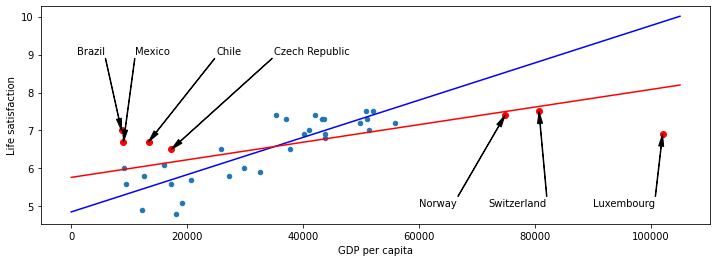

In [22]:
country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(12,4))

# plotagem da reta
X = np.linspace(0, 105000, 1000)
plt.plot(X, theta_0 + theta_1 * X, 'b')

# plotagem dos novos dados
text_pos = {'Brazil': (1000, 9), 'Mexico': (11000, 9), 'Chile': (25000, 9), 'Czech Republic': (35000, 9),
            'Norway': (60000, 5), 'Switzerland': (72000, 5), 'Luxembourg': (90000, 5)}
for country, pos in text_pos.items():
    data_x, data_y = missing_data.loc[country]
    plt.plot(data_x, data_y, 'ro')
    plt.annotate(country, xy=(data_x, data_y), xytext=pos, 
                 arrowprops=dict(facecolor='black', width=0.5, headwidth=5))

# novo modelo
full_model = linear_model.LinearRegression()
full_X = np.c_[full_country_stats['GDP per capita']]
full_y = np.c_[full_country_stats['Life satisfaction']]
full_model.fit(full_X, full_y)

# plotagem da nova reta
full_theta_0 = full_model.intercept_[0]
full_theta_1 = full_model.coef_[0, 0]
X = np.linspace(0, 105000, 1000)
plt.plot(X, full_theta_0 + full_theta_1 * X, 'r')

plt.show()

Usando um conjunto de treinamento não representativo, treinamos um modelo que dificilmente fará previsões precisas, especialmente para países muito pobres e muito ricos.

Então é crucial usar um conjunto de treinamento que seja representativo dos casos para os quais você deseja generalizar. 

Isso geralmente é mais difícil do que parece: se a amostra for muito pequena, você terá **ruído de amostragem** (_sampling noise_), quando dados não representativos são resultado do acaso.

Mesmo amostras muito grandes podem ser não representativas se o método de amostragem for falho. Isso é chamado de **viés de amostragem** (_sampling bias_).

## c. Dados de baixa qualidade

Se os dados de treinamento estiverem cheios de erros, ruídos (devido a medições de baixa qualidade) e valores discrepantes, será mais difícil para o sistema detectar os padrões subjacentes.

Então, é menos provável que o sistema tenha um bom desempenho. Geralmente, vale a pena gastar tempo limpando os dados de treinamento. De fato, a maioria dos cientistas de dados gasta uma parte significativa de seu tempo fazendo isso.

## d. Features(recursos, atributos) irrelevantes

    "garbage in, garbage out"

Um sistema só será capaz de aprender se os dados de treinamento contiverem _features_ relevantes suficientes e não muitas _features_ irrelevantes. Uma parte crítica do sucesso de um projeto de Machine Learning é identificar um bom conjunto de _features_ para treinar.

Este processo, denominado de Engenharia de _Features_, envolve:

- Seleção de _features_, escolhendo os atributos mais úteis para treinar entre os atributos existentes.

- Extração de _features_, combinando _features_ existentes para produzir uma _feature_ mais útil.

- Criação de novas _features_ por meio da coleta de novos dados.

## e. Overfitting

Um modelo sofre de _overfitting_ quando ele tem um bom desempenho nos dados de treinamento, mas não generaliza bem para novos dados.

Por exemplo, um modelo polinomial de grau elevado se ajusta muito bem aos dados de treinamento. Embora tenha um desempenho muito melhor nestes dados do que o modelo linear simples, este não é capaz de generalizar adequadamente.

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


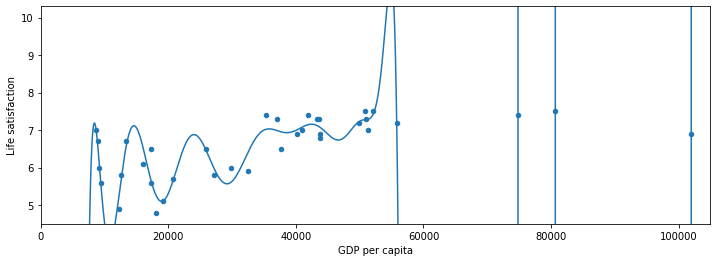

In [23]:
full_country_stats.plot(kind='scatter', x='GDP per capita', y='Life satisfaction', figsize=(12,4))

# funcionalidades auxiliares
from sklearn import preprocessing
from sklearn import pipeline
poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
scaler = preprocessing.StandardScaler()

# novo modelo
new_model = linear_model.LinearRegression()
pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', new_model)])
pipeline_reg.fit(full_X, full_y)

# plotagem da nova curva
X = np.linspace(0, 105000, 1000)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.axis([0, 105000, 4.5, 10.3])
plt.plot(X, curve)
plt.show()

# NOTA: é esperada a impressão de advertências abaixo, que refletem problemas numéricos desse modelo polinomial

Modelos complexos podem detectar padrões sutis nos dados, mas se o conjunto de treinamento for ruidoso ou muito pequeno (o que introduz ruído de amostragem), o modelo provavelmente detectará padrões no próprio ruído.

Tais padrões não são úteis para a etapa de generalização.

Em resumo, o _overfitting_ ocorre quando o modelo é muito complexo em relação à quantidade e ao ruído dos dados de treinamento. As soluções possíveis são:

- Simplificar o modelo: selecionar um modelo com menos parâmetros, reduzir o número de _features_ nos dados de treinamento ou restringir o modelo (com um processo de **regularização**, a ser visto posteriormente).

- Coletar mais dados de treinamento.

- Reduzir o ruído nos dados de treinamento (tipicamente corrigindo erros nos dados e removendo _outliers_(valores atípicos)).

## f. Underfitting

O fenômeno de _underfitting_ é o oposto de _overfitting_: ele ocorre quando o modelo é muito simples para aprender a estrutura subjacente dos dados.

Por exemplo, um modelo linear de satisfação pessoal tende a ser insuficiente; a realidade é bem mais complexa do que o modelo, então suas previsões estão fadadas a serem imprecisas, mesmo nos exemplos de treinamento.

As principais opções para corrigir o problema de _underfitting_ são:

- Selecionar um modelo mais poderoso, com mais parâmetros.

- Alimentar o algoritmo de aprendizado com melhores _features_.

- Reduzir as restrições do modelo (ajustando o processo de regularização).